In [ ]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')

import os
dir_Path = "/content/drive/MyDrive/nlp"
os.chdir(dir_Path)

In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/nlp/train.csv')
test=pd.read_csv('/content/drive/MyDrive/nlp/test.csv')

In [ ]:
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [ ]:
train.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [ ]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###
count=train.isnull().sum().sort_values(ascending=False)
percntage=(train.isnull().sum()/len(train)*100).sort_values(ascending=False)
missing=pd.concat([count,percntage],axis=1,
keys=['count','percentage'])
missing

,count,percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


In [ ]:
train.Is_Response.value_counts(normalize=True)#percntage of occurance

happy        0.681213
not happy    0.318787
Name: Is_Response, dtype: float64

In [ ]:
train.Is_Response.value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [ ]:
print(round(train.Is_Response.value_counts(normalize=True))*100,2)

happy        100.0
not happy      0.0
Name: Is_Response, dtype: float64 2


In [ ]:
print(round(train.Is_Response.value_counts(normalize=True)*100,2))

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


percentage of default
happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


Text(0.5, 1.0, '% of distribution in values')

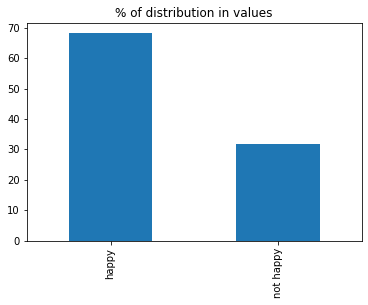

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print('percentage of default')
print(round(train.Is_Response.value_counts(normalize=True)*100,2))
round(train.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('% of distribution in values')


In [ ]:
train.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [ ]:
#applying first level cleaning

import re
import string


In [ ]:
#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
  text=text.lower()
  text=re.sub('\[.?/]','',text)
  text=re.sub('[%s]'%  re.escape(string.punctuation),'',text )
  text = re.sub('\w*\d\w*', '', text)
  return text
cleaned1 = lambda x: text_clean_1(x)

In [ ]:
train['cleaned_description'] = pd.DataFrame(train.Description.apply(cleaned1))
train.head()

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [ ]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [ ]:
train['cleaned_description_new'] = pd.DataFrame(train['cleaned_description'].apply(cleaned2))
train.head()

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...


In [ ]:
from sklearn.model_selection import train_test_split
independent_var=train.cleaned_description_new
dependent_var=train.Is_Response

xtrain,xtest,ytrain,ytest=train_test_split(independent_var,dependent_var,test_size=0.1,random_state=225)
print('xtrain',len(xtrain))
print('xtest',len(xtest))
print('ytrain',len(ytrain))
print('ytest',len(ytest))

xtrain 35038
xtest 3894
ytrain 35038
ytest 3894


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec=TfidfVectorizer()
logi=LogisticRegression()

from sklearn.pipeline import Pipeline 

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',logi)])
model.fit(xtrain, ytrain)

from sklearn.metrics import confusion_matrix

predictions = model.predict(xtest)

confusion_matrix(predictions, ytest)

array([[2417,  305],
       [ 154, 1018]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, ytest))
print("Precision : ", precision_score(predictions, ytest, average = 'weighted'))
print("Recall : ", recall_score(predictions, ytest, average = 'weighted'))

Accuracy :  0.8821263482280431
Precision :  0.8887432732018882
Recall :  0.8821263482280431


In [ ]:
example = ["I'm sad"]
result = model.predict(example)

print(result)

['not happy']
